In [1]:
import ROOT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.28/04


## Accetanza geometrica

### Simulazione

In [13]:
%run ./Classe_2verticali.ipynb

I primi due valori più frequenti sono: [0.0, 106029.15538034055]


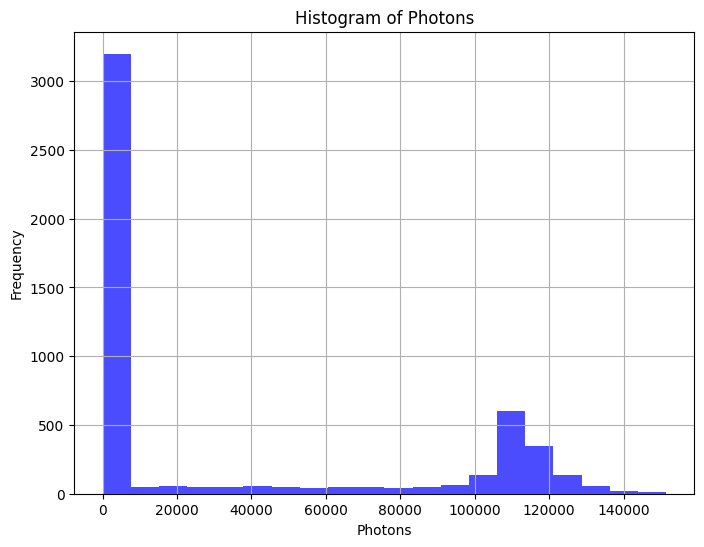

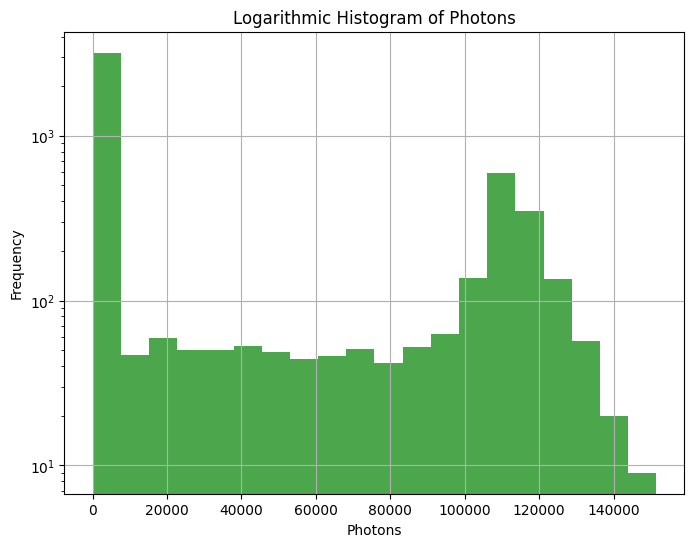

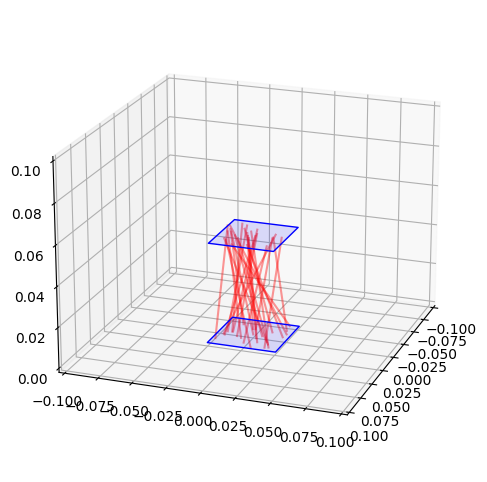

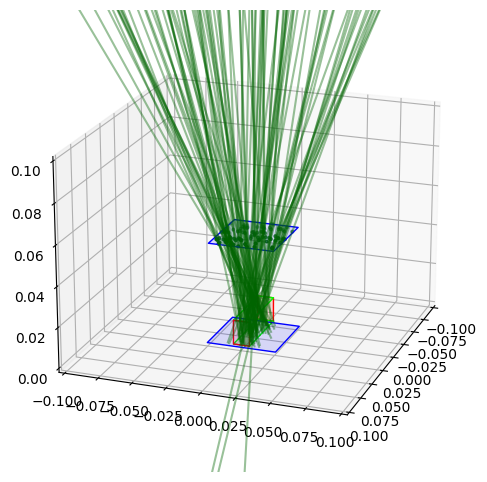

('Numero totale dei raggi',
 195840,
 'Numero di intersezioni rivelatori di trigger: ',
 52511,
 'Numero di intersezioni rivelatori di misura: ',
 18999,
 'Percentuale trigger/tot',
 26.813214869281044,
 'Percentuale measure/tot',
 9.701286764705882,
 'Accettanza geometrica',
 36.180990649578185,
 ' % Numero 1: ',
 59.77683035949261,
 ' % Numero 2: ',
 13.979683141217958,
 ' % Numero 3: ',
 13.574398652560662,
 ' % Numero 4: ',
 6.258224117058793,
 ' % Numero 5: ',
 6.410863729669983,
 'Energia rilasciata per muone',
 array([ 0.        ,  0.        , 14.26326251, ...,  0.        ,
         0.        ,  0.        ]),
 'MeV',
 'Lunghezza percorsa',
 array([0.        , 0.        , 0.01333638, ..., 0.        , 0.        ,
        0.        ]),
 'Fotoni attesi per muone',
 array([     0.        ,      0.        , 116958.75254159, ...,
             0.        ,      0.        ,      0.        ]),
 'Primi 10 dati',
 2     116958.752542
 4     112531.664782
 9     120430.647339
 21     55390.08

In [14]:
a_t1 = 0.051 #m
b_t1 = 0.051
a_t2 = 0.052
b_t2 = 0.048
h_t = 0.05
a_m = 0.05
b_m = 0.012
h_m = 0.012
detector_height = 0.001
total_time_hours = 48
density = 7130 #kg/m^3
muon_energy = 0.15 #MeV m^2 / kg
light_yield = 8200 #ph/MeV


rivelatori = Rivelatori(a_t1, b_t1, a_t2, b_t2, h_t, a_m, b_m, h_m, detector_height, total_time_hours, density, muon_energy, light_yield)


released_energy, photons, d_m, muon_df = rivelatori.count_photons()
released_energy, photons, d_m, muon_df  = rivelatori.run(total_time_hours, get_dataframe=True, plot_graphs=True, plot_log_histogram=True)


rivelatori.plot_rays(graph_rays = False)
rivelatori.plot_trigger(graph_trigger = True)
rivelatori.plot_measure(graph_measure = True)

### Dati

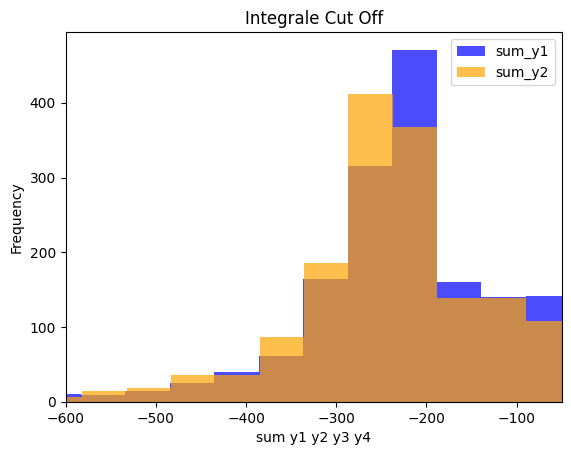

Numero di eventi: 1566
Percentuale:  34.87750556792873 %


In [10]:
datapath = "~/Desktop/Tesi/"
df = pd.read_csv(datapath + '20230828-1743_BGO_2SIPM_no-filtri_trigger_ext.txt', sep = " ", header = None, names = ["frame", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"])

unique_frames = df['frame'].unique()
int_dict1 = {'frame': [], 'sum_y1': [], 'sum_y2': [], 'sum_y3':[], 'sum_y4':[]}

for frame in unique_frames:
    frame_data = df[df['frame'] == frame]
    sum_y1 = frame_data['y1'].sum()
    sum_y2 = frame_data['y2'].sum()
    sum_y3 = frame_data['y3'].sum()
    sum_y4 = frame_data['y4'].sum()
    
    if  sum_y1 <= -40 and sum_y2 <= -40 and sum_y3 <= 0 and sum_y4 <= 0:
        int_dict1['frame'].append(frame)
        int_dict1['sum_y1'].append(sum_y1)
        int_dict1['sum_y2'].append(sum_y2)
        int_dict1['sum_y3'].append(sum_y3)
        int_dict1['sum_y4'].append(sum_y4)

int_df1 = pd.DataFrame(int_dict1)

#plt.figure(figsize=(10, 6))
plt.hist(int_df1['sum_y1'], bins=20, color='blue', alpha=0.7, label='sum_y1')
plt.hist(int_df1['sum_y2'], bins=20, color='orange', alpha=0.7, label='sum_y2')
plt.title('Integrale Cut Off')
plt.xlabel('sum y1 y2 y3 y4')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(- 600, - 50)
plt.show()

events_tot = len(int_df)
events = len(int_df1)
print("Numero di eventi:", events )
print("Percentuale: ", events/events_tot * 100, "%")

## Carica accumulata: confronto simulazione - dati

In [2]:
datapath = "~/Desktop/Tesi/"
df = pd.read_csv(datapath + '20230828-1743_BGO_2SIPM_no-filtri_trigger_ext.txt', sep = " ", header = None, names = ["frame", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"])

%jsroot on
unique_frames = df['frame'].unique()
int_dict = {'frame': [], 'sum_y1' : [], 'sum_y2': [], 'sum_y3': [], 'sum_y4': []}

for frame in unique_frames:
    frame_data = df[df['frame'] == frame]
    sum_y1 = frame_data['y1'].sum()
    sum_y2 = frame_data['y2'].sum()
    sum_y3 = frame_data['y3'].sum()
    sum_y4 = frame_data['y4'].sum()
    int_dict['frame'].append(frame)
    int_dict['sum_y1'].append(sum_y1)
    int_dict['sum_y2'].append(sum_y2)
    int_dict['sum_y3'].append(sum_y3)
    int_dict['sum_y4'].append(sum_y4)

int_df = pd.DataFrame(int_dict)

hist_1_dati = ROOT.TH1F("histo_1_dati", "hist_1", 100, 10, 600)
hist_1_dati_originali = ROOT.TH1F("hist_1_dati_originali", "hist_1", 100, -600, 10)
hist_2_dati = ROOT.TH1F("hist_2_dati", "hist_2", 100, 0, 600)
hist_2_dati_originali = ROOT.TH1F("hist_2_dati_originali", "hist_2", 100, -600, 0)


for index, row in int_df.iterrows():
    hist_1_dati.Fill(-1*row['sum_y1'])
    hist_1_dati_originali.Fill(row['sum_y1'])
    hist_2_dati.Fill(-1*(row['sum_y2']))
    hist_2_dati_originali.Fill(row['sum_y2'])

hist_1_dati.SetLineColor(ROOT.kOrange)
hist_1_dati_originali.SetLineColor(ROOT.kMagenta)
hist_2_dati.SetLineColor(ROOT.kOrange)
hist_2_dati_originali.SetLineColor(ROOT.kMagenta)

In [3]:
a_t1 = 0.051 #m
b_t1 = 0.051
a_t2 = 0.052
b_t2 = 0.048
h_t = 0.05
a_m = 0.05
b_m = 0.012
h_m = 0.012
detector_height = 0.001
total_time_hours = 48
density = 7130 #kg/m^3
muon_energy = 0.15 #MeV m^2 / kg
light_yield = 8200 #ph/MeV


S_t = a_t1 * b_t1
S_m = a_m * b_m
expected_muons = S_t * 70 * 2 *np.pi
expected_muons_min = expected_muons * 60
n = int(expected_muons_min) * total_time_hours * 60 
th = np.arccos((1 - np.random.random(n)) ** (1/3))
ph = 2 * np.pi * np.random.random(n)
st, ct = np.sin(th), np.cos(th)
sp, cp = np.sin(ph), np.cos(ph)
us, vs, ws = st * cp, st * sp, ct
x0s = np.random.rand(n) * a_t1 - a_t1 / 2
y0s = np.random.rand(n) * b_t1 - b_t1 / 2
z0s = np.zeros(n)

x1s = x0s + h_t * us/ws 
y1s = y0s + h_t * vs/ws
z1s = np.full(n, h_t)
        
xd = x0s + detector_height * us/ws
yd = y0s + detector_height * vs/ws
zd = np.full(n, detector_height)
        
xu = x0s + (detector_height + h_m) * us/ws
yu = y0s + (detector_height + h_m) * vs/ws
zu = np.full(n,(detector_height + h_m))

x1v = x0s + (b_m/2 - y0s) * (us / vs)
y1v = np.full(n, b_m/2)
z1v = z0s + (b_m/2 - y0s) * (ws / vs)

x2v = x0s + (-b_m/2 - y0s) * (us / vs)
y2v = np.full(n, -b_m/2)
z2v = z0s + (-b_m/2 - y0s) * (ws / vs)      

hitmax_trigger = (-a_t2/2 < x1s) & (x1s < a_t2/2) & (-b_t2/2 < y1s) & (y1s < b_t2/2)
hitmax_measure_down = (-a_m/2 < xd) & (xd < a_m/2) & (-b_m/2 < yd) & (yd < b_m/2) 
hitmax_measure_up = (-a_m/2 < xu) & (xu < a_m/2) & (-b_m/2 < yu) & (yu < b_m/2) 
hitmax_measure_vert1 =  (-a_m/2 < x1v) & (x1v < a_m/2) & (detector_height < z1v) & (z1v < detector_height + h_m)
hitmax_measure_vert2 =  (-a_m/2 < x2v) & (x2v < a_m/2) & (detector_height < z2v) & (z2v < detector_height + h_m)
         
hitmax_measure1 = hitmax_trigger & hitmax_measure_up & hitmax_measure_down    
hitmax_measure2 = hitmax_trigger & hitmax_measure_up & hitmax_measure_vert1
hitmax_measure3 = hitmax_trigger & hitmax_measure_up & hitmax_measure_vert2   
hitmax_measure4 = hitmax_trigger & hitmax_measure_down & hitmax_measure_vert1
hitmax_measure5 = hitmax_trigger & hitmax_measure_down & hitmax_measure_vert2

        
hitmax_measure = hitmax_measure1 + hitmax_measure2 + hitmax_measure3 + hitmax_measure4 + hitmax_measure5 
    
num_trigger = np.count_nonzero(hitmax_trigger)
num_measure = np.count_nonzero(hitmax_measure)

d1 = np.sqrt( (xd - xu )**2 + ( yd - yu )**2 + ( zd - zu )**2 )
d2 = np.sqrt( (x1v - xu )**2 + ( y1v -yu )**2 + ( z1v - zu )**2 )
d3 = np.sqrt( (x2v - xu )**2 + ( y2v - yu )**2 + ( z2v - zu )**2 )
d4 = np.sqrt( (xd - x1v )**2 + ( yd - y1v )**2 + ( zd - z1v )**2 )
d5 = np.sqrt( (xd - x2v )**2 + ( yd - y2v )**2 + ( zd - z2v )**2 )
d_m = hitmax_trigger*(hitmax_measure1 * d1 + hitmax_measure2 * d2 + hitmax_measure3 * d3 + hitmax_measure4 * d4 + hitmax_measure5 * d5)

released_energy = d_m * density * muon_energy
photons = released_energy * light_yield
muons_tot = total_time_hours * expected_muons_min * 60  #cm

muon_data = []
for i in range(int(num_measure)):
    muon_entry = {
        'length_traveled': d_m[i],
        'released_energy': released_energy[i],
        'photons': photons[i],
        'trigger' : hitmax_trigger[i],
        'measure': hitmax_measure[i]
    }
    muon_data.append(muon_entry)

muon_df = pd.DataFrame(muon_data)

frequenze, bordi_bin = np.histogram((muon_df.query('trigger'))['photons'], bins = 1000)
valori_frequenti = []
for _ in range(2):  
    valore_piu_frequente = bordi_bin[np.argmax(frequenze)]
    valori_frequenti.append(valore_piu_frequente)
    frequenze = np.delete(frequenze, np.argmax(frequenze))
    bordi_bin = np.delete(bordi_bin, np.argmax(frequenze))

valore_piu_probabile = valori_frequenti[1]
v = [valore / valore_piu_probabile for valore in bordi_bin]

In [7]:
%jsroot on

photons_list = (muon_df.query('measure'))['photons']
landau_list = []

nmax =0
for elemento in photons_list:
    landau = ROOT.TF1("landau", "landau", 0, 500)
    v = (227)* (elemento / valore_piu_probabile)
    landau.SetParameters(1, v , 11)
    landau_list.append(landau)

hist_random_points = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 500)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points.Fill(random_point)

c = ROOT.TCanvas("c")
hist_random_points.Draw()
hist_random_points.SetTitle("Convoluzione simulata (BGO)")
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [8]:
c = ROOT.TCanvas("c")
hist_2_dati.Draw()
hist_2_dati.SetFillColor(ROOT.kOrange) 
hist_random_points.Draw("same")
hist_2_dati.SetTitle("Confronto dati - simulazione BGO")
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)  
legend.AddEntry(hist_2_dati, "Dati", "f") 
legend.AddEntry(hist_random_points, "Simulazione", "f")
legend.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
